In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
train_df = pd.read_csv("Datasets/Accident_Severity_train.csv",index_col=0)
test_df = pd.read_csv("Datasets/Accident_Severity_test.csv",index_col=0)

In [ ]:
train_df.head(15)

In [ ]:
test_df.head(15)

In [ ]:
print(train_df.shape)
print(test_df.shape)

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df.describe(include='all')

In [ ]:
test_df.describe(include='all')

In [ ]:
#Preprocessing
# Date and time
#Latitude and longitude 
#vehicals involved - float > int
# traffic incidents - float > int

In [ ]:
train_df.Accident_Occurred.unique()

In [ ]:
train_df.drop('Accident_Occurred',axis=1,inplace=True)
test_df.drop('Accident_Occurred',axis=1,inplace=True)

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
train_df['Date_and_Time'] = pd.to_datetime(train_df['Date_and_Time'])
test_df['Date_and_Time'] = pd.to_datetime(test_df['Date_and_Time'])

In [ ]:
train_df['Date_and_Time'].dtype

In [ ]:
test_df['Date_and_Time'].dtype

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
# extract the year, month, hours from a date time column in a pandas dataframe
# Extract year, month, and hour in train df
train_df['year'] = train_df['Date_and_Time'].dt.year
train_df['month'] = train_df['Date_and_Time'].dt.month
train_df['hour'] = train_df['Date_and_Time'].dt.hour

In [ ]:
# Extract year, month, and hour in test df
test_df['year'] = test_df['Date_and_Time'].dt.year
test_df['month'] = test_df['Date_and_Time'].dt.month
test_df['hour'] = test_df['Date_and_Time'].dt.hour

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
train_df.drop('Date_and_Time',axis=1,inplace=True)
test_df.drop('Date_and_Time',axis=1,inplace=True)

In [ ]:
#!pip install reverse_geocoder

In [ ]:
import reverse_geocoder as rg
import time

# Start time
start_time = time.time()

# Prepare list of tuples of latitudes and longitudes
coords = list(zip(train_df['Latitude'], train_df['Longitude']))

# Use reverse_geocoder in batch mode (vectorized)
results = rg.search(coords)

# Extract city names from the results
train_df['city'] = [result['name'] for result in results]

# End time
end_time = time.time()

# Total time taken
print(f"Time taken for 15,000 records: {end_time - start_time} seconds")

# Display the DataFrame (optional)
#print(df)

In [ ]:
train_df.head(30)

In [ ]:
train_df.city.unique()

In [ ]:
# Start time
start_time = time.time()

# Prepare list of tuples of latitudes and longitudes
coords = list(zip(test_df['Latitude'], test_df['Longitude']))

# Use reverse_geocoder in batch mode (vectorized)
results = rg.search(coords)

# Extract city names from the results
test_df['city'] = [result['name'] for result in results]

# End time
end_time = time.time()

# Total time taken
print(f"Time taken for 4,000 records: {end_time - start_time} seconds")

In [ ]:
test_df.head()

In [ ]:
test_df.city.unique()

In [ ]:
train_df.drop(['Latitude','Longitude'],axis=1,inplace=True)
test_df.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [ ]:
train_df['Vehicles_Involved'].isnull().sum()

In [ ]:
train_df['Vehicles_Involved'].median() 

In [ ]:
train_df['Vehicles_Involved'].fillna(train_df['Vehicles_Involved'].median(),inplace=True)

In [ ]:
train_df['Vehicles_Involved'].isnull().sum()

In [ ]:
train_df['Traffic_Incidents'].isnull().sum()

In [ ]:
train_df['Traffic_Incidents'].median() 

In [ ]:
train_df['Traffic_Incidents'].fillna(train_df['Traffic_Incidents'].median(),inplace=True)

In [ ]:
train_df['Traffic_Incidents'].isnull().sum()

In [ ]:
test_df['Vehicles_Involved'].fillna(2.0,inplace=True)
test_df['Traffic_Incidents'].fillna(2.0,inplace=True)

In [ ]:
test_df['Vehicles_Involved'].isnull().sum()

In [ ]:
test_df['Traffic_Incidents'].isnull().sum()

In [ ]:
train_df['Vehicles_Involved'] = train_df['Vehicles_Involved'].astype(int)
test_df['Vehicles_Involved'] = test_df['Vehicles_Involved'].astype(int)

In [ ]:
train_df['Traffic_Incidents'] = train_df['Traffic_Incidents'].astype(int)
test_df['Traffic_Incidents'] = test_df['Traffic_Incidents'].astype(int)

In [ ]:
train_df.head(5)

In [ ]:
test_df.head(5)

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.isnull().sum()

In [ ]:
round(train_df['Proximity_to_Hospital'].mean(),2)

In [ ]:
round(train_df['Road_Width'].mean(),2) 

In [ ]:
train_df['Proximity_to_Hospital'].fillna(round(train_df['Proximity_to_Hospital'].mean(),2),inplace=True)
train_df['Road_Width'].fillna(round(train_df['Road_Width'].mean(),2),inplace=True)

In [ ]:
test_df['Proximity_to_Hospital'].fillna(2506.8,inplace=True)
test_df['Road_Width'].fillna(6.49,inplace=True)

In [ ]:
train_df.isnull().sum()

In [ ]:
test_df.isnull().sum()

In [ ]:
colname=[]
for x in train_df.columns:
    if train_df[x].dtype=='object':
        colname.append(x)
colname

In [ ]:
for i in colname:
    print({i:train_df[i].unique()})

In [ ]:
colnametest=[]
for x in test_df.columns:
    if test_df[x].dtype=='object':
        colnametest.append(x)
colnametest

In [ ]:
for i in colnametest:
    print({i:test_df[i].unique()})

In [ ]:
#dropping these columns by domain knowledge and to avoid duplicate columns weather type,congestion
#level,driver education level, is weekend,

In [ ]:
train_df.drop(['Weather_Type','Congestion_Level','Driver_Education_Level','Is_Weekend'],axis=1,inplace=True)
test_df.drop(['Weather_Type','Congestion_Level','Driver_Education_Level','Is_Weekend'],axis=1,inplace=True)

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
train_df.head()

In [ ]:
train_df.describe()

In [ ]:
#drop temperature, humidity,Wind_Speed, Precipitation, Dew_point,Heat_index,Time_to_Accident,Population_Density

In [ ]:
train_df.drop(['Dew_Point','Traffic_Incidents'],axis=1,inplace=True)
test_df.drop(['Dew_Point','Traffic_Incidents'],axis=1,inplace=True)

In [ ]:
colnamenum=[]
for x in train_df.columns:
    if train_df[x].dtype!='object':
        colnamenum.append(x)
colnamenum

In [ ]:
for x in train_df.columns:
    if train_df[x].dtype=='float64':
        train_df[x]=round(train_df[x],2)
    else:
        pass

In [ ]:
train_df.head()

In [ ]:
for x in test_df.columns:
    if test_df[x].dtype=='float64':
        test_df[x]=round(test_df[x],2)
    else:
        pass
    

In [ ]:
test_df.head()

In [ ]:
train_df.duplicated().sum()

In [ ]:
test_df.duplicated().sum()

In [ ]:
train_df[colnamenum]

In [ ]:
train_df['Temperature'].dtype

In [ ]:
corr_df=train_df[colnamenum].corr(method='pearson')
print(corr_df)

In [ ]:
train_df.drop(['Humidity','Cloud_Cover'],axis=1,inplace=True)
test_df.drop(['Humidity','Cloud_Cover'],axis=1,inplace=True)

In [ ]:
#temp,humid
#visibility,cloud cover

In [ ]:
colnamenum=[]
for x in train_df.columns:
    if train_df[x].dtype!='object':
        colnamenum.append(x)
colnamenum

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = train_df[colnamenum].columns
vif_df["VIF Factor"] = [vif(train_df[colnamenum].values, i) for i in range(train_df[colnamenum].shape[1])] 
#shape is 3 cols i in range 0 to 2 cal vif for i col index and col values now i is dept var and vif is calculated
vif_df.round(2)

In [ ]:
train_df.drop(['Pressure'],axis=1,inplace=True)
test_df.drop(['Pressure'],axis=1,inplace=True)

In [ ]:
train_df.head()

In [ ]:
#train_df.drop(['Heat_Index','Wind_Speed'],axis=1,inplace=True)
#test_df.drop(['Heat_Index','Wind_Speed'],axis=1,inplace=True)

In [ ]:
#train_df.to_csv('clean_accident_severity_train_dataset.csv')

In [ ]:
#test_df.to_csv('clean_accident_severity_test_dataset.csv')

In [ ]:
train_df=pd.read_csv('clean_accident_severity_train_dataset.csv')
test_df=pd.read_csv('clean_accident_severity_test_dataset.csv')

In [ ]:
#

In [ ]:
colname1=[]
for i in train_df.columns:
    if train_df[i].dtype == 'object':
        colname1.append(i)

colname1

In [ ]:
colname1=['Road_Type',
 'Surface_Conditions',
 'Lighting_Conditions',
 'Traffic_Control',
 'Accident_Type',
 'Day_of_Week',
 'Time_of_Day',
 'Weather_Conditions',
 'Peak_Hour',
 'Bicycle_Lane_Availability',
 'Pedestrian_Crossing_Availability',
 'city']

In [ ]:
train_df.set_index('Accident_ID', inplace=True)
test_df.set_index('Accident_ID', inplace=True)

In [ ]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname1:
    le.fit(train_df[x])
    train_df[x]=le.transform(train_df[x]) #mandatory
    test_df[x]=le.transform(test_df[x])
    

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) #optional check labels
    print('Feature', x)
    print('mapping', le_name_mapping)

In [ ]:
train_df.head()

In [ ]:
test_df.head()

In [ ]:
#Feature Accident_Severity is target variable y
#mapping {'Fatal Injury': 2, 'Serious Injury': 1, 'Slight Injury': 0}

In [ ]:
train_df['Accident_Severity'].replace({'Fatal Injury': 2, 'Serious Injury': 1, 'Slight Injury': 0},inplace=True)

In [ ]:
train_df.head()

In [142]:
X= train_df.drop('Accident_Severity',axis=1)
Y=train_df['Accident_Severity']

In [143]:
X.head()

,Road_Type,Surface_Conditions,Lighting_Conditions,Traffic_Control,Accident_Type,Vehicles_Involved,Pedestrians_Involved,Day_of_Week,Time_of_Day,Weather_Conditions,Temperature,Wind_Speed,Precipitation,Visibility,Heat_Index,Wind_Chill,Average_Speed,Vehicle_Density,Traffic_Flow,Time_to_Accident,Peak_Hour,Road_Work_Proximity,Nearby_Accidents,Traffic_Signals,Proximity_to_School,Proximity_to_Hospital,Proximity_to_Shopping_Center,Road_Width,Lane_Count,Intersection_Proximity,Bicycle_Lane_Availability,Pedestrian_Crossing_Availability,Population_Density,Street_Lighting_Proximity,year,month,hour,city
Accident_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17816,1,2,1,0,1,2,2,5,0,1,37.78,8.56,0.00,0.75,49.36,8.89,63.59,74.84,681.84,9.72,1,1161.98,3,6,817.74,2506.80,1748.59,6.49,1,627.16,0,0,3267.30,144.93,2021,1,7,1
18371,1,0,2,1,0,1,1,4,3,0,15.51,6.94,0.00,9.03,44.66,12.35,86.28,77.71,839.12,5.61,1,151.97,0,3,4961.81,2975.26,4864.93,4.27,2,497.83,0,0,9408.16,425.64,2021,2,10,1
1380,1,0,1,1,0,2,1,6,3,1,8.43,8.61,0.00,0.93,20.36,5.97,25.31,55.84,682.57,10.21,1,1794.53,2,7,1019.06,3046.47,612.89,8.53,1,572.22,0,1,5822.85,189.74,2019,2,11,2
14764,2,1,2,1,1,1,2,1,3,3,6.42,7.50,26.19,3.91,40.97,4.37,28.29,65.02,932.00,17.30,1,1153.50,1,3,4237.27,839.64,4755.29,7.21,4,836.22,1,0,1144.60,442.15,2020,9,3,1
7347,0,0,2,0,1,1,1,3,3,0,15.25,14.74,0.00,5.34,34.88,8.13,100.29,67.28,142.65,1.42,0,1961.55,3,2,553.80,4475.88,4199.98,3.02,3,255.60,0,1,9067.34,442.14,2019,11,2,1


In [144]:
Y

Accident_ID
17816    1
18371    2
1380     1
14764    2
7347     0
        ..
13124    1
19649    0
9846     0
10800    1
2733     1
Name: Accident_Severity, Length: 16000, dtype: int64

In [145]:
X.shape

(16000, 38)

In [146]:
Y.shape

(16000,)

In [147]:
from sklearn.preprocessing import StandardScaler
 
scaler=StandardScaler()
scaler.fit(X)             
X=scaler.transform(X)
test_df_scale=scaler.transform(test_df)
print(X)

[[ 0.23197935  0.95377877 -0.34685411 ... -1.40675219 -0.64763623
  -0.61170163]
 [ 0.23197935 -1.16734992  1.32071375 ... -1.12384932 -0.21482075
  -0.61170163]
 [ 0.23197935 -1.16734992 -0.34685411 ... -1.12384932 -0.07054892
  -0.0270755 ]
 ...
 [-0.91359768 -1.16734992  1.32071375 ... -1.12384932 -0.93617989
  -0.61170163]
 [ 1.37755637  0.95377877  1.32071375 ... -0.84094646  1.66071301
  -0.61170163]
 [ 1.37755637  0.95377877 -0.34685411 ... -0.55804359  1.22789752
  -0.61170163]]


In [148]:
print(test_df_scale)

[[ 1.37755637  0.95377877 -2.01442197 ... -0.84094646 -0.79190806
  -0.61170163]
 [ 0.23197935  0.95377877 -0.34685411 ...  0.29066502  0.21799473
  -0.61170163]
 [-0.91359768 -1.16734992  1.32071375 ...  1.42227649 -0.07054892
  -0.61170163]
 ...
 [-0.91359768  0.95377877  1.32071375 ... -1.12384932  1.37216935
  -0.61170163]
 [ 0.23197935  0.95377877 -0.34685411 ...  0.57356788 -1.08045172
  -0.61170163]
 [-0.91359768  0.95377877  1.32071375 ... -1.40675219  1.37216935
  -0.0270755 ]]


In [149]:
#train set and validation set split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [150]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11200, 38)
(11200,)
(4800, 38)
(4800,)


In [151]:
y_train.value_counts()

Accident_Severity
0    5502
1    3949
2    1749
Name: count, dtype: int64

In [152]:
print("Before OverSampling, counts of label '1': ", (sum(y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(y_train == 0)))
print("Before OverSampling, counts of label '2': ", (sum(y_train == 2))) 
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
  
print('After OverSampling, the shape of train_X: ', (x_train_res.shape))
print('After OverSampling, the shape of train_y: ', (y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(y_train_res == 0)))
print("After OverSampling, counts of label '2': ", (sum(y_train_res == 2)))

Before OverSampling, counts of label '1':  3949
Before OverSampling, counts of label '0':  5502
Before OverSampling, counts of label '2':  1749
After OverSampling, the shape of train_X:  (16506, 38)
After OverSampling, the shape of train_y:  (16506,)
After OverSampling, counts of label '1':  5502
After OverSampling, counts of label '0':  5502
After OverSampling, counts of label '2':  5502


In [153]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()
#train the model object
classifier.fit(x_train_res, y_train_res)

#print intercepts and coefficients
print(classifier.intercept_)
print(classifier.coef_)

[ 0.00762987  0.00447966 -0.01210952]
[[ 0.00172004 -0.02848984  0.01220708 -0.02850915 -0.00505301  0.02444806
  -0.00056815 -0.00239339 -0.00724694  0.03896768 -0.00737854  0.01391793
  -0.00727367  0.06839618 -0.00180157  0.01845251 -0.01165343  0.00244796
   0.02975608 -0.01082686  0.00032537 -0.00295553 -0.01542037 -0.01508635
  -0.00710538  0.00895    -0.01753251 -0.01069518  0.00177883  0.00768724
  -0.00367786 -0.02044151  0.01082777  0.01943277  0.00680488 -0.01103507
   0.01113336  0.05398204]
 [-0.00660875  0.0017637   0.0344327  -0.00803252  0.01640346  0.03440123
   0.01918318  0.0247267   0.00890466  0.01637811  0.00711996 -0.05288114
   0.01756742  0.04346115  0.01158236 -0.01252293 -0.00458642 -0.0110075
   0.00544159  0.02711921 -0.00483255  0.00429929 -0.00536576  0.0103342
   0.01142482  0.02012328  0.00812647  0.01924037 -0.00230808  0.01105789
   0.00175152 -0.02560149 -0.00212904  0.01740097  0.02712238  0.02017187
   0.00501827 -0.03210786]
 [ 0.00488871  0.02672

In [154]:
Y_pred_logistic = classifier.predict(x_test)
print(Y_pred_logistic)

[2 0 1 ... 0 1 2]


In [155]:
Y_pred_prob = classifier.predict_proba(x_test)
print(Y_pred_prob)

[[0.30316131 0.27523048 0.42160821]
 [0.35817743 0.32363493 0.31818765]
 [0.36740991 0.40696559 0.2256245 ]
 ...
 [0.38670307 0.35978358 0.25351335]
 [0.33257904 0.35888058 0.30854038]
 [0.28505661 0.32613217 0.38881122]]


In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,Y_pred_logistic)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,Y_pred_logistic))
 
acc=accuracy_score(y_test, Y_pred_logistic)
print("Accuracy of the model: ",acc)

[[741 672 929]
 [551 522 636]
 [221 224 304]]
Classification report: 
              precision    recall  f1-score   support

           0       0.49      0.32      0.38      2342
           1       0.37      0.31      0.33      1709
           2       0.16      0.41      0.23       749

    accuracy                           0.33      4800
   macro avg       0.34      0.34      0.32      4800
weighted avg       0.40      0.33      0.34      4800

Accuracy of the model:  0.32645833333333335


In [157]:
from sklearn.tree import DecisionTreeClassifier
#create a model object
model_DecisionTree = DecisionTreeClassifier(random_state=10,criterion='gini')
# train the model object
model_DecisionTree.fit(x_train_res,y_train_res) #trainig phase is building the DTree fit Tree

y_pred=model_DecisionTree.predict(x_test)
print(y_pred)

[1 1 1 ... 0 1 2]


In [158]:
model_DecisionTree.score(x_train_res, y_train_res)

1.0

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[1072  847  423]
 [ 804  600  305]
 [ 336  267  146]]
Classification report: 
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      2342
           1       0.35      0.35      0.35      1709
           2       0.17      0.19      0.18       749

    accuracy                           0.38      4800
   macro avg       0.33      0.33      0.33      4800
weighted avg       0.39      0.38      0.38      4800

Accuracy of the model:  0.37875


In [160]:
sample=pd.DataFrame()
 
sample["Column"]=train_df.drop('Accident_Severity',axis=1).columns
sample["Imp value"]=model_DecisionTree.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
4,Accident_Type,0.053439
2,Lighting_Conditions,0.043293
33,Street_Lighting_Proximity,0.043161
17,Vehicle_Density,0.041285
18,Traffic_Flow,0.040991
15,Wind_Chill,0.039581
14,Heat_Index,0.037657
21,Road_Work_Proximity,0.037590
25,Proximity_to_Hospital,0.036997
19,Time_to_Accident,0.035904


In [161]:
model_DT1= DecisionTreeClassifier(random_state=10)

In [162]:
#parameters for trial and error should be passed here
parameter_space = {
          #np.arange(100, 1001,50),
    'max_depth':[10,15,8, 12],
    'min_samples_leaf':[1,3,4,5,6,7],
    'min_samples_split':[5,10,20,50,100]
    }
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
clf_DT = GridSearchCV(model_DT1, parameter_space, n_jobs=-1, cv=5) #cv=5 means 5 fold cv

In [ ]:
'''criterion='gini',
                                 splitter="best",
                                 min_samples_leaf=3,
                                 min_samples_split=5,
                                 max_depth=10,
                                  max_leaf_nodes=100,
                                  #max_features=0.6
''''

In [163]:
clf_DT.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 8, 12],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7],
                         'min_samples_split': [5, 10, 20, 50, 100]})

In [164]:
print('best parameters found:\n',clf_DT.best_params_) 

best parameters found:
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [165]:
clf_DT.best_score_  #cv accuracy list avg score - cv score

0.4618397119533735

In [166]:
y_pred_clf=clf_DT.predict(x_test)

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_clf)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred_clf))
 
acc=accuracy_score(y_test, y_pred_clf)
print("Accuracy of the model: ",acc)

[[1978  326   38]
 [1460  226   23]
 [ 641   96   12]]
Classification report: 
              precision    recall  f1-score   support

           0       0.48      0.84      0.62      2342
           1       0.35      0.13      0.19      1709
           2       0.16      0.02      0.03       749

    accuracy                           0.46      4800
   macro avg       0.33      0.33      0.28      4800
weighted avg       0.39      0.46      0.37      4800

Accuracy of the model:  0.46166666666666667


In [ ]:
#Prunned DTree is performing better than base DTree in terms of predicting all classes accuracy is 46%

In [168]:
from sklearn.ensemble import RandomForestClassifier
#create a model object
model_RandomForest = RandomForestClassifier(random_state=10,n_estimators=100,bootstrap=True,n_jobs=-1)
# train the model object
model_RandomForest.fit(x_train_res,y_train_res) #trainig phase is building the DTree Trees 100

y_pred_forest=model_RandomForest.predict(x_test)
print(y_pred_forest)

[1 0 0 ... 0 0 1]


In [169]:
model_RandomForest.score(x_train_res, y_train_res)

1.0

In [170]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_forest)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred_forest))
 
acc=accuracy_score(y_test, y_pred_forest)
print("Accuracy of the model: ",acc)

[[1894  439    9]
 [1370  329   10]
 [ 590  155    4]]
Classification report: 
              precision    recall  f1-score   support

           0       0.49      0.81      0.61      2342
           1       0.36      0.19      0.25      1709
           2       0.17      0.01      0.01       749

    accuracy                           0.46      4800
   macro avg       0.34      0.34      0.29      4800
weighted avg       0.39      0.46      0.39      4800

Accuracy of the model:  0.4639583333333333


In [ ]:
model_RF1= RandomForestClassifier(random_state=10, bootstrap=True) #fixed parameters should be passsed here
 
#parameters for trial and error should be passed here
parameter_space = {
    'n_estimators':[100,300,500],       #np.arange(100, 1001,50),
    'max_depth':[10,15,8,12],
    'min_samples_leaf':[1,3,4,5,6,7]
    }
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
clf_RF = GridSearchCV(model_RF1, parameter_space, n_jobs=-1, cv=5) #cv=5 means 5 fold cv

In [ ]:
clf_RF.fit(x_train_res,y_train_res)

In [ ]:
print('best parameters found:\n',clf_RF.best_params_) 

In [ ]:
clf_RF.best_score_  #cv accuracy list avg score - cv score

In [ ]:
y_pred_clf_RF=clf_RF.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_clf_RF)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred_clf_RF))
 
acc=accuracy_score(y_test, y_pred_clf_RF)
print("Accuracy of the model: ",acc)

In [172]:
y_train_res.value_counts()

Accident_Severity
0    5502
1    5502
2    5502
Name: count, dtype: int64

In [173]:
Y.value_counts()

Accident_Severity
0    7844
1    5658
2    2498
Name: count, dtype: int64

In [174]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#create a model object
model_AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=10),n_estimators=100,random_state=10)
# train the model object
model_AdaBoost.fit(x_train_res,y_train_res) #trainig phase is building the DTree fit Tree

y_pred_AdaBoost=model_AdaBoost.predict(x_test)

In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_AdaBoost)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred_AdaBoost))
 
acc=accuracy_score(y_test, y_pred_AdaBoost)
print("Accuracy of the model: ",acc)

[[1062  851  429]
 [ 803  593  313]
 [ 332  273  144]]
Classification report: 
              precision    recall  f1-score   support

           0       0.48      0.45      0.47      2342
           1       0.35      0.35      0.35      1709
           2       0.16      0.19      0.18       749

    accuracy                           0.37      4800
   macro avg       0.33      0.33      0.33      4800
weighted avg       0.38      0.37      0.38      4800

Accuracy of the model:  0.3747916666666667


In [177]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
#create a model object
model_XGBoost = XGBClassifier(n_estimators=2000,random_state=10)
# train the model object
model_XGBoost.fit(x_train_res,y_train_res) #trainig phase is building the DTree fit Tree

y_pred_XGBoost=model_XGBoost.predict(x_test)

In [178]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_XGBoost)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred_XGBoost))
 
acc=accuracy_score(y_test, y_pred_XGBoost)
print("Accuracy of the model: ",acc)

[[1476  762  104]
 [1091  533   85]
 [ 488  233   28]]
Classification report: 
              precision    recall  f1-score   support

           0       0.48      0.63      0.55      2342
           1       0.35      0.31      0.33      1709
           2       0.13      0.04      0.06       749

    accuracy                           0.42      4800
   macro avg       0.32      0.33      0.31      4800
weighted avg       0.38      0.42      0.39      4800

Accuracy of the model:  0.424375


In [179]:
from sklearn.neighbors import KNeighborsClassifier
#create a model object
model_KNN = KNeighborsClassifier(n_neighbors=2,metric='euclidean')
# train the model object
model_KNN.fit(x_train_res,y_train_res)

y_pred_KNN= model_KNN.predict(x_test)

In [180]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_KNN)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred_KNN))
 
acc=accuracy_score(y_test, y_pred_KNN)
print("Accuracy of the model: ",acc)

[[978 796 568]
 [733 535 441]
 [309 281 159]]
Classification report: 
              precision    recall  f1-score   support

           0       0.48      0.42      0.45      2342
           1       0.33      0.31      0.32      1709
           2       0.14      0.21      0.17       749

    accuracy                           0.35      4800
   macro avg       0.32      0.31      0.31      4800
weighted avg       0.38      0.35      0.36      4800

Accuracy of the model:  0.34833333333333333


In [181]:
from sklearn.svm import SVC
# Initialize the SVM model with the RBF kernel
svm_model = SVC(kernel='rbf', random_state=10)

# Fit the model on the training data
svm_model.fit(x_train_res, y_train_res)
# Predict on validation data
y_pred_svm = svm_model.predict(x_test)

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred_svm)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred_svm))
 
acc=accuracy_score(y_test, y_pred_svm)
print("Accuracy of the model: ",acc)

[[1414  683  245]
 [ 972  537  200]
 [ 443  228   78]]
Classification report: 
              precision    recall  f1-score   support

           0       0.50      0.60      0.55      2342
           1       0.37      0.31      0.34      1709
           2       0.15      0.10      0.12       749

    accuracy                           0.42      4800
   macro avg       0.34      0.34      0.34      4800
weighted avg       0.40      0.42      0.41      4800

Accuracy of the model:  0.42270833333333335


In [ ]:
#DL - ANN

In [ ]:
!pip install tensorflow

In [ ]:
print(tensorflow.__version__)

In [183]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense

In [192]:
# sequential model tyo initialise ANN model and dense module to build the layers
model = Sequential()

#Adding the input layer and the first hidden layer
model.add(Dense(units=64,kernel_initializer='uniform',activation='relu',input_dim=38))
#Adding the second hidden layer
model.add(Dense(units=30,kernel_initializer='uniform',activation='relu'))
#Adding the third hidden layer
#model.add(Dense(units=200,kernel_initializer='uniform',activation='relu'))
#model.add(Dense(units=400,kernel_initializer='uniform',activation='relu'))

#Adding the output layer
model.add(Dense(units=3,kernel_initializer='uniform',activation='softmax'))

In [193]:
# Compiling the ANN means applying SGD on the whole SNN
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [194]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,539 (17.73 KB)

 Trainable params: 4,539 (17.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN to
#H is history parameter, history of acc and loss is stored here

In [187]:
from keras.utils import to_categorical

In [188]:
# Assuming you have 3 classes (0, 1, 2)
y_train_res_onehot = to_categorical(y_train_res, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)  # Apply this to validation data as well if needed

In [189]:
y_train_res_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [190]:
y_test_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [195]:
# Train the model
H = model.fit(x_train_res, y_train_res_onehot, epochs=120, batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4170 - loss: 1.0529 - val_accuracy: 0.0000e+00 - val_loss: 1.6761
Epoch 2/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4429 - loss: 1.0203 - val_accuracy: 0.0000e+00 - val_loss: 1.6926
Epoch 3/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4403 - loss: 1.0184 - val_accuracy: 0.0000e+00 - val_loss: 1.7354
Epoch 4/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4618 - loss: 1.0116 - val_accuracy: 0.0000e+00 - val_loss: 1.6101
Epoch 5/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4724 - loss: 1.0047 - val_accuracy: 0.0000e+00 - val_loss: 1.5856
Epoch 6/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4941 - loss: 0.9883 - val_accuracy: 0.0000e+00 - val_loss: 1.5679
Epoch 7/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5050 - loss: 0.9854 - val_accuracy: 6.0569e-04 - val_loss: 1.5075
Epoch 8/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.51

Epoch 51/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - loss: 0.7885 - val_accuracy: 0.3677 - val_loss: 1.2344
Epoch 52/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6596 - loss: 0.7836 - val_accuracy: 0.3680 - val_loss: 1.2423
Epoch 53/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - loss: 0.7815 - val_accuracy: 0.4094 - val_loss: 1.1745
Epoch 54/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - loss: 0.7870 - val_accuracy: 0.4043 - val_loss: 1.1753
Epoch 55/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 0.7859 - val_accuracy: 0.4213 - val_loss: 1.1484
Epoch 56/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - loss: 0.7740 - val_accuracy: 0.3895 - val_loss: 1.2095
Epoch 57/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6646 - loss: 0.7776 - val_accuracy: 0.4185 - val_loss: 1.1522
Epoch 58/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.7779 - 

Epoch 101/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.6922 - val_accuracy: 0.4152 - val_loss: 1.2204
Epoch 102/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7091 - loss: 0.6874 - val_accuracy: 0.5088 - val_loss: 1.0421
Epoch 103/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 0.7094 - val_accuracy: 0.4443 - val_loss: 1.1653
Epoch 104/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.6937 - val_accuracy: 0.4425 - val_loss: 1.1676
Epoch 105/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 0.7047 - val_accuracy: 0.5279 - val_loss: 1.0206
Epoch 106/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7060 - loss: 0.6968 - val_accuracy: 0.4727 - val_loss: 1.1011
Epoch 107/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.7014 - val_accuracy: 0.5239 - val_loss: 1.0080
Epoch 108/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7098 - loss: 0

In [196]:
EPOCHS=120

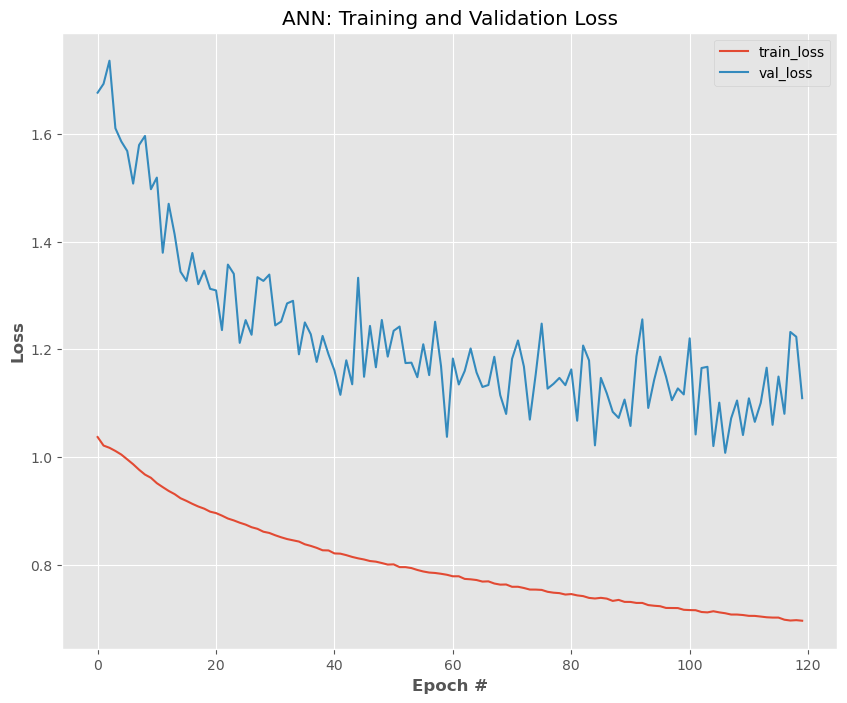

In [197]:
N= np.arange(0,EPOCHS)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,H.history['loss'],label='train_loss')
plt.plot(N,H.history['val_loss'],label='val_loss')
plt.title('ANN: Training and Validation Loss')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Loss',weight='bold')
plt.legend()
plt.show()

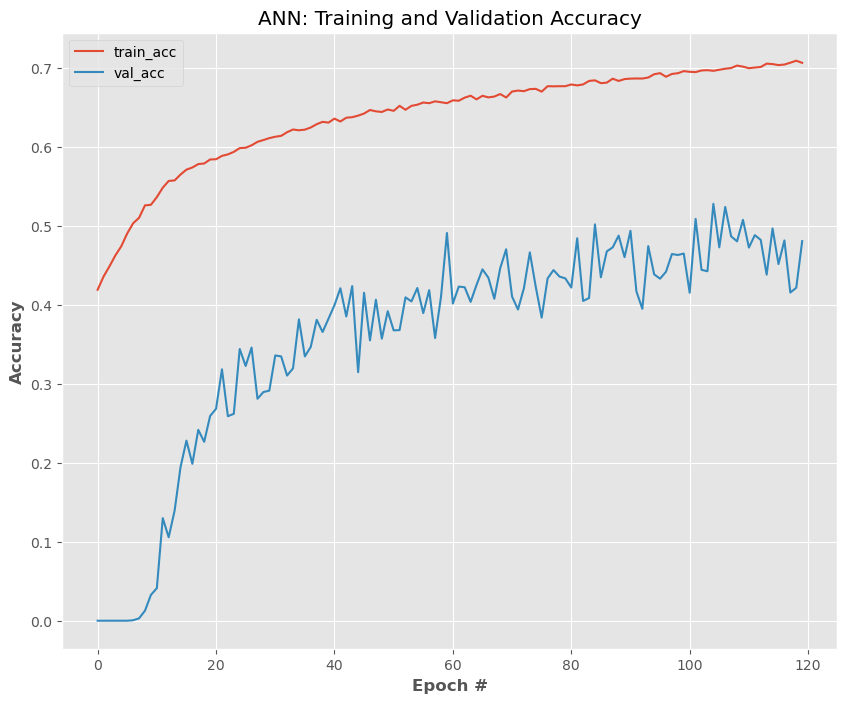

In [198]:
N= np.arange(0,EPOCHS)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,H.history['accuracy'],label='train_acc')
plt.plot(N,H.history['val_accuracy'],label='val_acc')
plt.title('ANN: Training and Validation Accuracy')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Accuracy',weight='bold')
plt.legend()
plt.show()

In [199]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(x_test, y_test_onehot)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.4299 - loss: 1.5113
Validation Accuracy: 41.42%


In [200]:
# Predict on the validation data
y_pred_ANN = model.predict(x_test)

# Convert predictions from one-hot encoded form to label format
y_pred_classes = np.argmax(y_pred_ANN, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Evaluate the classification performance
print(f'Accuracy: {accuracy_score(y_true, y_pred_classes) * 100:.2f}%')
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
Accuracy: 41.42%
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      2342
           1       0.36      0.42      0.39      1709
           2       0.14      0.08      0.11       749

    accuracy                           0.41      4800
   macro avg       0.34      0.34      0.33      4800
weighted avg       0.40      0.41      0.40      4800

[[1211  917  214]
 [ 841  715  153]
 [ 354  333   62]]


In [201]:
X.shape

(16000, 38)

In [202]:
Y.shape

(16000,)

In [203]:
Y.value_counts()

Accident_Severity
0    7844
1    5658
2    2498
Name: count, dtype: int64

In [204]:
print("Before OverSampling, counts of label '1': ", (sum(Y == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y == 0)))
print("Before OverSampling, counts of label '2': ", (sum(Y == 2))) 
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
x_res, y_res = sm.fit_resample(X, Y)
  
print('After OverSampling, the shape of train_X: ', (x_res.shape))
print('After OverSampling, the shape of train_y: ', (y_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(y_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(y_res == 0)))
print("After OverSampling, counts of label '2': ", (sum(y_res == 2)))

Before OverSampling, counts of label '1':  5658
Before OverSampling, counts of label '0':  7844
Before OverSampling, counts of label '2':  2498
After OverSampling, the shape of train_X:  (23532, 38)
After OverSampling, the shape of train_y:  (23532,)
After OverSampling, counts of label '1':  7844
After OverSampling, counts of label '0':  7844
After OverSampling, counts of label '2':  7844


In [205]:
# Assuming you have 3 classes (0, 1, 2)
y_res_onehot = to_categorical(y_res, num_classes=3)
#y_test_onehot = to_categorical(y_test, num_classes=3)  # Apply this to validation data as well if needed

In [206]:
# Train the model
H = model.fit(x_res, y_res_onehot, epochs=120, batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6091 - loss: 0.9494 - val_accuracy: 0.3620 - val_loss: 1.3038
Epoch 2/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6139 - loss: 0.8896 - val_accuracy: 0.3380 - val_loss: 1.3100
Epoch 3/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6171 - loss: 0.8751 - val_accuracy: 0.2857 - val_loss: 1.3939
Epoch 4/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6148 - loss: 0.8643 - val_accuracy: 0.3459 - val_loss: 1.2529
Epoch 5/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.8524 - val_accuracy: 0.2730 - val_loss: 1.3683
Epoch 6/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6155 - loss: 0.8609 - val_accuracy: 0.2677 - val_loss: 1.3824
Epoch 7/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6221 - loss: 0.8469 - val_accuracy: 0.2794 - val_loss: 1.3275
Epoch 8/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6268 - loss: 0.8397 - val_accu

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6716 - loss: 0.7616 - val_accuracy: 0.3372 - val_loss: 1.2869
Epoch 52/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6645 - loss: 0.7667 - val_accuracy: 0.3117 - val_loss: 1.3359
Epoch 53/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6637 - loss: 0.7617 - val_accuracy: 0.3299 - val_loss: 1.2769
Epoch 54/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6643 - loss: 0.7592 - val_accuracy: 0.3214 - val_loss: 1.3071
Epoch 55/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6645 - loss: 0.7644 - val_accuracy: 0.3474 - val_loss: 1.2921
Epoch 56/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6660 - loss: 0.7642 - val_accuracy: 0.3767 - val_loss: 1.2278
Epoch 57/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6686 - loss: 0.7557 - val_accuracy: 0.3352 - val_loss: 1.2941
Epoch 58/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6747 - loss: 0.7536 - val_accuracy:

295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6975 - loss: 0.7094 - val_accuracy: 0.4022 - val_loss: 1.2517
Epoch 102/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6936 - loss: 0.7126 - val_accuracy: 0.3813 - val_loss: 1.3083
Epoch 103/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6999 - loss: 0.7011 - val_accuracy: 0.3367 - val_loss: 1.4052
Epoch 104/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.7243 - val_accuracy: 0.4198 - val_loss: 1.2192
Epoch 105/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6938 - loss: 0.7110 - val_accuracy: 0.3939 - val_loss: 1.2615
Epoch 106/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6936 - loss: 0.7064 - val_accuracy: 0.4676 - val_loss: 1.1136
Epoch 107/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6923 - loss: 0.7106 - val_accuracy: 0.4610 - val_loss: 1.1378
Epoch 108/120
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6988 - loss: 0.7060 - val_ac

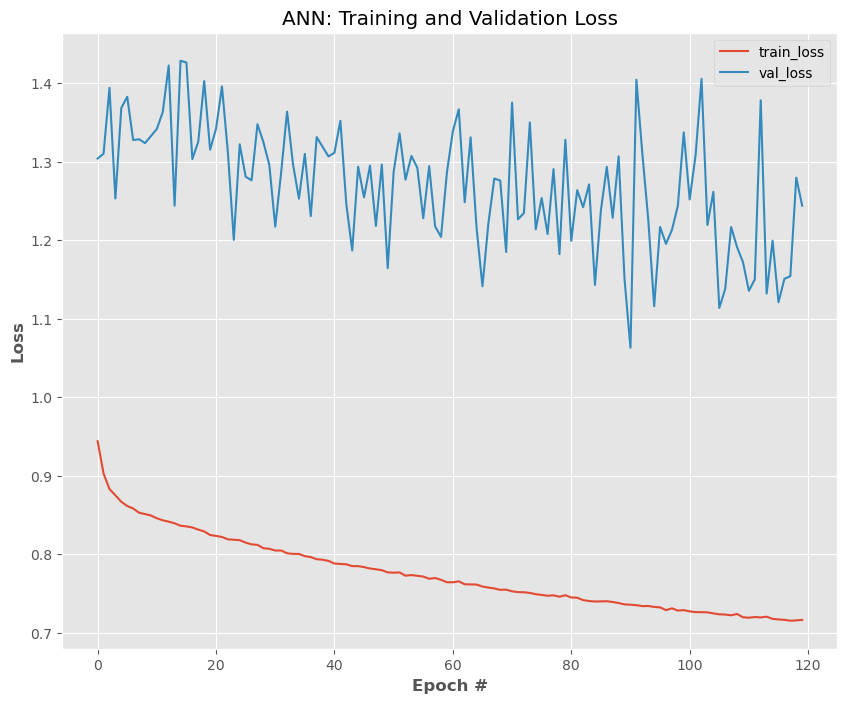

In [207]:
EPOCHS=120

N= np.arange(0,EPOCHS)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,H.history['loss'],label='train_loss')
plt.plot(N,H.history['val_loss'],label='val_loss')
plt.title('ANN: Training and Validation Loss')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Loss',weight='bold')
plt.legend()
plt.show()

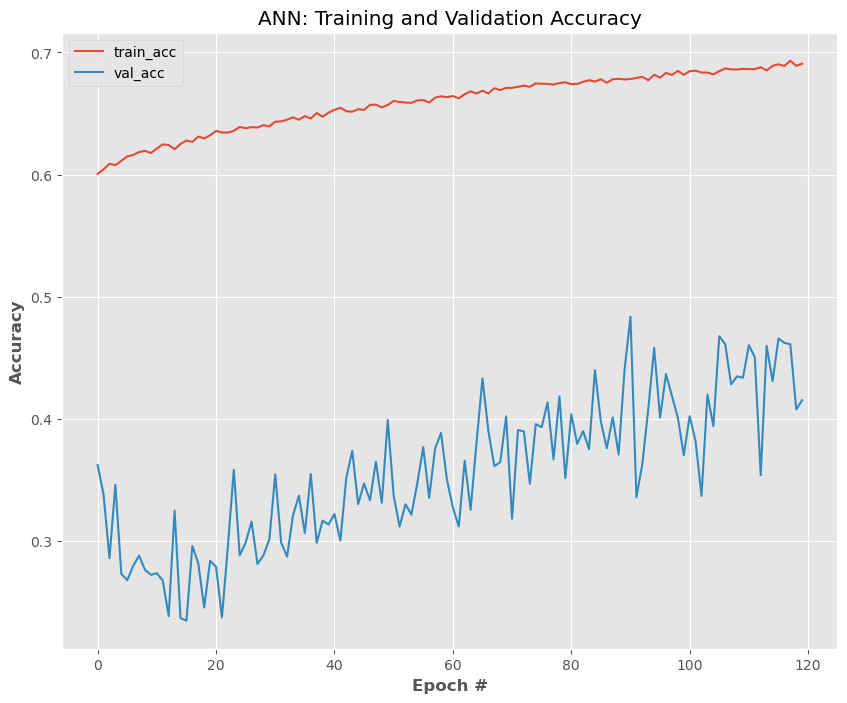

In [208]:
N= np.arange(0,EPOCHS)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,H.history['accuracy'],label='train_acc')
plt.plot(N,H.history['val_accuracy'],label='val_acc')
plt.title('ANN: Training and Validation Accuracy')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Accuracy',weight='bold')
plt.legend()
plt.show()

In [209]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(x_res, y_res_onehot)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

736/736 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.6807 - loss: 0.7250
Validation Accuracy: 65.03%


In [210]:
# Predict on the validation data
y_pred_ANN = model.predict(test_df_scale)

# Convert predictions from one-hot encoded form to label format
y_pred_classes = np.argmax(y_pred_ANN, axis=1)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


In [211]:
test_df_scale.shape

(4000, 38)

In [212]:
y_pred_classes

array([0, 1, 2, ..., 0, 1, 0], dtype=int64)

In [213]:
len(y_pred_classes)

4000

In [214]:
#result=pd.DataFrame(test_df.index,y_pred_classes,columns=['Accident_Severity'])
result_ANN=pd.DataFrame(test_df.index,columns=['Accident_ID'])

In [215]:
result_ANN

,Accident_ID
0,19134
1,4981
2,16643
3,19117
4,5306
...,...
3995,17088
3996,11121
3997,9861
3998,14548


In [216]:
result_ANN['Accident_Severity']=y_pred_classes

In [217]:
result_ANN

,Accident_ID,Accident_Severity
0,19134,0
1,4981,1
2,16643,2
3,19117,1
4,5306,0
...,...,...
3995,17088,0
3996,11121,0
3997,9861,0
3998,14548,1


In [218]:
result_ANN['Accident_Severity'].replace({2:'Fatal Injury',1:'Serious Injury',0:'Slight Injury'},inplace=True)

In [219]:
result_ANN

,Accident_ID,Accident_Severity
0,19134,Slight Injury
1,4981,Serious Injury
2,16643,Fatal Injury
3,19117,Serious Injury
4,5306,Slight Injury
...,...,...
3995,17088,Slight Injury
3996,11121,Slight Injury
3997,9861,Slight Injury
3998,14548,Serious Injury


In [220]:
#result_ANN.to_csv('hackathon_submission_ann.csv',index=False,header=True)

In [ ]:
#train_df['Accident_Severity'].replace({'Fatal Injury': 2, 'Serious Injury': 1, 'Slight Injury': 0},inplace=True)

In [ ]:
#result